<a href="https://colab.research.google.com/github/kirankokateGitHub/UnsupervisedML2/blob/main/Kiran_unsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Kiran

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/kirankokateGitHub/UnsupervisedML2

# **Problem Statement**


**Write Problem Statement Here.**

The objective of this undertaking is to examine the collection of movies and TV shows on Netflix, sourced from the third-party search engine Flixable, and categorize them into meaningful clusters. This effort aims to improve user satisfaction and reduce subscriber attrition for Netflix, the leading online streaming service provider globally, with a subscriber base exceeding 220 million as of the second quarter of 2022. By delving into the dataset, encompassing content available up to 2019, we intend to reveal fresh perspectives and patterns in the swiftly expanding domain of streaming entertainment.

The dataset encompasses TV shows and movies accessible on Netflix up until 2019, sourced from the third-party Netflix search engine, Flixable. In 2018, an intriguing report from Flixable highlighted a remarkable trend: the count of TV shows on Netflix had nearly tripled since 2010. During the same period, the collection of movies had diminished by over 2,000 titles, while TV show availability had experienced a nearly threefold increase. Exploring this dataset promises to reveal a wealth of additional insights awaiting discovery.

Furthermore, the potential for enriching this dataset by integrating it with external data sources like IMDB ratings





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Let's import all required Libraries and modules

# libraries that are usefull for  data analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# library for Word Cloud
from wordcloud import WordCloud, STOPWORDS

# Textual data libraries
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries to be usefull to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library for ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [4]:
# Load Dataset
path= '/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
# Let's make a netfix dataframe named as 'nfdf'
nfdf=pd.read_csv(path)

### Dataset First View

In [5]:
# Dataset First Look
nfdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
nfdf.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
nfdf.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3914,s3915,Movie,Manorama Six Feet Under,Navdeep Singh,"Abhay Deol, Gul Panag, Raima Sen, Sarika, Kulb...",India,"September 28, 2020",2007,TV-14,129 min,"Dramas, International Movies, Thrillers",A government employee and aspiring crime write...
4666,s4667,Movie,Operation Christmas Drop,Martin Wood,"Kat Graham, Alexander Ludwig, Virginia Madsen,...",United States,"November 5, 2020",2020,TV-G,96 min,"Children & Family Movies, Comedies, Romantic M...",A by-the-book political aide falls for a big-h...
6601,s6602,TV Show,The Little Nyonya,NaN,"Jeanette Aw, Qi Yu Wu, Pierre Png, Dai Xiangyu...",NaN,"November 1, 2017",2009,TV-14,1 Season,"International TV Shows, TV Dramas",An orphaned Chinese woman in Singapore refuses...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
1224,s1225,Movie,Carol,Todd Haynes,"Cate Blanchett, Rooney Mara, Sarah Paulson, Ky...","United Kingdom, United States, Australia","October 20, 2020",2015,R,119 min,"Dramas, LGBTQ Movies, Romantic Movies","In the 1950s, a glamorous married woman and an..."


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
nfdf.shape

(7787, 12)

### Dataset Information

In [9]:
# Dataset Info
nfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
nfdf.duplicated().sum()

0

No duplicated values has been found.

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
nfdf.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

below variables/columns has mentioned null values.

director        2389

cast             718

country          507

date_added        10

rating             7

In [12]:
# let's check the percentage of missing/null values.
round((nfdf.isna().sum()/len(nfdf))*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

Respective variable with it's missing values in percetage are as follows:

director    -    30.68 %

cast       -      9.22 %

country       -   6.51 %

date_added   -    0.13 %

rating       -    0.09 %

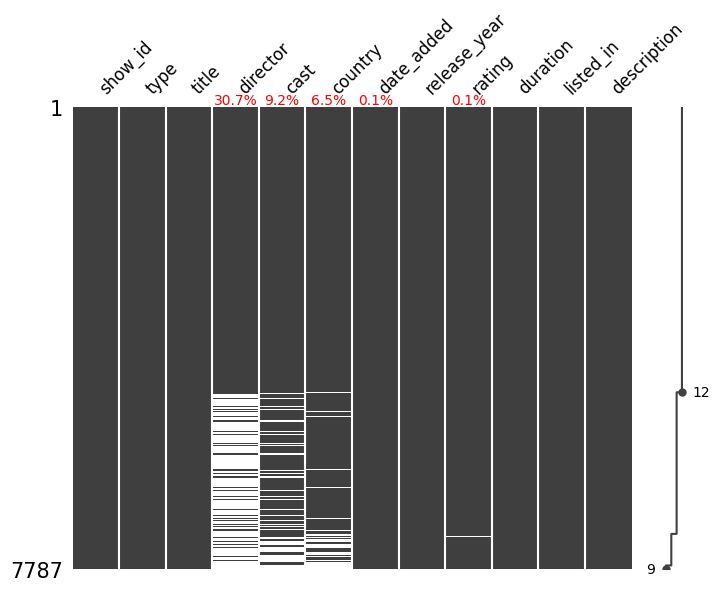

In [13]:
# Visualizing the missing values
# Import missing number library to visualise the missing numbers.
import missingno as msno
# Calculate the percentage of missing values for each column
missing_percentage = nfdf.isnull().mean() * 100

# Create the matrix plot
matrix_plot = msno.matrix(
    nfdf,          # DataFrame containing the data you want to visualize
    sort='descending', # Sorting order for the matrix ('ascending', 'descending', or None)
    figsize=(8, 6),    # Figure size (width, height) in inches
    fontsize=12       # Font size for text in the plot
)

# Add missing value percentages as annotations to the plot
for i, percentage in enumerate(missing_percentage):
    if percentage > 0:
        matrix_plot.annotate(
            f'{percentage:.1f}%',   # Format the percentage with one decimal place
            (i, 1),                  # Position of the annotation (column index, y-coordinate)
            color='red',             # Color of the annotation
            fontsize=10,             # Font size for the annotation text
            ha='center',             # Horizontal alignment
            va='bottom'              # Vertical alignment
        )

plt.show()  # Display the plot

### What did you know about your dataset?

The dataset, with 7787 rows and 12 columns, pertains to the online streaming industry. Our tasks include exploring the dataset, creating clustering methods, and building a content-based recommendation system.

Clustering involves grouping similar data points together to identify inherent patterns. We'll employ clustering algorithms to uncover these patterns without prior knowledge of the groups.

Certain columns such as 'director,' 'cast,' 'country,' 'date_added,' and 'rating' contain missing values. Since each row represents a specific movie, traditional imputation isn't feasible. To retain data and considering the dataset size, we'll impute numeric values using empty strings.





Answer Here

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
nfdf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
nfdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN




There are 7787 unique entries for show IDs and titles.

The majority of entries are labeled as "Movie" (5377) compared to other types.

The director "Raúl Campos, Jan Suter" appears most frequently (18 times).


"David Attenborough" is the most common cast member (18 times).

"United States" is the top country (2555 times) in terms of content.

Content was most frequently added on "January 1, 2020" (118 times).

The release years span from 1925 to 2021, with an average of around 2013.

"TV-MA" is the predominant rating (2863 times).

"1 Season" is the most common duration (1608 times).

"Documentaries" is the leading category (334 times).

The most frequent description involves missing husbands (3 times).

### Variables Description

Show_id : Unique ID for every Movie / Tv Show

Type : Identifier - A Movie or TV Show

Title : Title of the Movie / Tv Show

Director : Director of the Movie

Cast : Actors involved in the movie / show

Country : Country where the movie / show was produced

Date_added : Date it was added on Netflix

Release_year : Actual Releaseyear of the movie / show

Rating : TV Rating of the movie / show

Duration : Total Duration - in minutes or number of seasons

Listed_in : Genere

Description: The Summary description

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
nfdf.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.
# Let's Handling null/missing values

# Fill the null values of features 'director', 'cast' and 'country' with "Director Unavailable", "Cast Unavailable" and "Country Unavailable" respectively.
nfdf.director.fillna("Director Unavailable", inplace = True)
nfdf.cast.fillna("Cast Unavailable", inplace = True)
nfdf.country.fillna("Country Unavailable", inplace = True)

#  Now Drop null/missing values from 'date_added' and 'rating columns'.
nfdf.dropna(subset=["date_added",'rating'], inplace=True)

Given the prevalence of null values in columns like director, cast, and country, outright removal is impractical.

Therefore, we've replaced these nulls with placeholders: "Director Unavailable," "Cast Unavailable," and "Country Unavailable."

Conversely, for columns like date_added and rating, which exhibit minimal null entries, we've opted to eliminate those instances.

In [18]:
# Let's cross Check for null/missing values are that eliminated or not.
nfdf.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
# Let's check shape of null free dataset.
nfdf.shape

(7770, 12)

Now No. of rows are 7770.

**Let's Handle Outliers**

In [20]:
# Let's find Categorical variables present the dataframe
cat_var = [var for var in nfdf.describe(include='object')]
print(f'Dataframe having {len(cat_var)} categorical variables as follows:')
print(cat_var)

Dataframe having 11 categorical variables as follows:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [21]:
# Let's Find numerical variables presen in the dataframe
num_var = [var for var in nfdf.columns if var not in cat_var]
print(f'Datframe having {len(num_var)} numerical variables as follows:')
print(num_var)

Datframe having 1 numerical variables as follows:
['release_year']


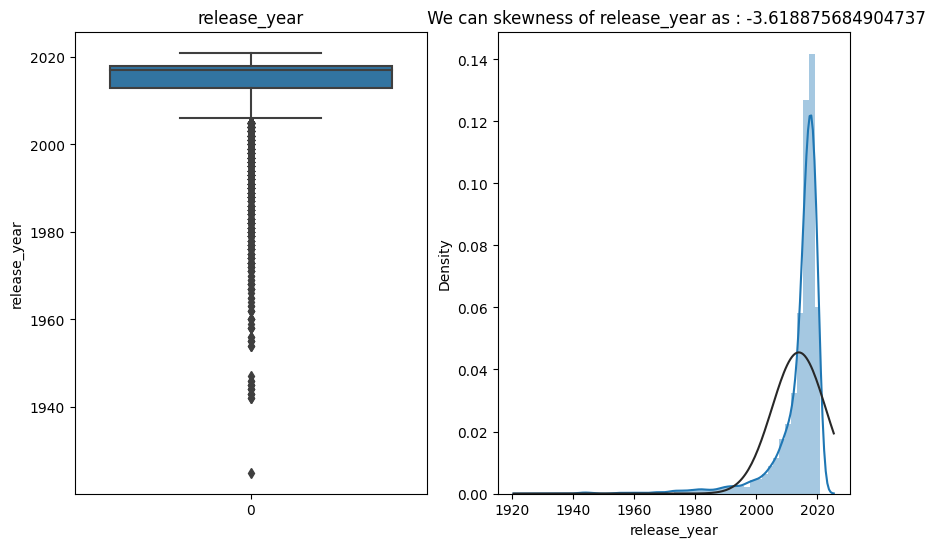

In [22]:
# Let's Check for outliers in numerical data typed variables by using boxplot

# Import library to check normality in distribution
from scipy.stats import norm

# Let's Plot Box and Distribution plot using 'for' loop

for var in num_var:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data = nfdf[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(nfdf[var], fit=norm)
    ax.set_title(f' We can skewness of {var} as : {nfdf[var].skew()}')
    ax.set_xlabel(var)
    plt.show()

In [23]:
# Use Inter Quartile Range to remove outliers from numerical variables of the dataframe

# Let's find IQR
Q1 = nfdf['release_year'].quantile(0.25)
Q3 = nfdf['release_year'].quantile(0.75)
IQR = Q3-Q1

# Defining upper and lower limit
lower_limit = nfdf['release_year'].quantile(0.25)-1.5*IQR
upper_limit = nfdf['release_year'].quantile(0.75)+1.5*IQR

# Applying lower and upper limit
nfdf.loc[(nfdf['release_year'] > upper_limit), 'release_year'] = upper_limit
nfdf.loc[(nfdf['release_year'] < lower_limit), 'release_year'] = lower_limit

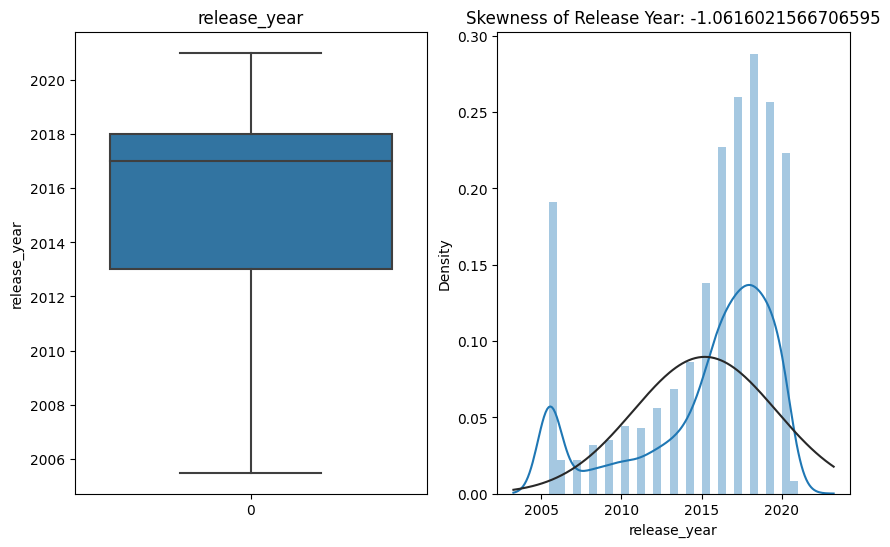

In [24]:
## Let's check outliers in 'release year' after removed by IQR Using boxplot

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
ax=sns.boxplot(data = nfdf['release_year'])
ax.set_title('release_year')
ax.set_ylabel('release_year')

plt.subplot(1,2,2)
ax=sns.distplot(nfdf['release_year'], fit=norm)
ax.set_title(f"Skewness of Release Year: {nfdf['release_year'].skew()}")
ax.set_xlabel('release_year')
plt.show()


Outliers in the 'release_year' variable have been effectively managed using the interquartile range method.

**Feature Engineering**

In [25]:
# Let's check dataframe i.e head
nfdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020.0,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016.0,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011.0,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009.0,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008.0,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [26]:
# Let's Ensure that variables are in the correct data types
nfdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7770 non-null   object 
 1   type          7770 non-null   object 
 2   title         7770 non-null   object 
 3   director      7770 non-null   object 
 4   cast          7770 non-null   object 
 5   country       7770 non-null   object 
 6   date_added    7770 non-null   object 
 7   release_year  7770 non-null   float64
 8   rating        7770 non-null   object 
 9   duration      7770 non-null   object 
 10  listed_in     7770 non-null   object 
 11  description   7770 non-null   object 
dtypes: float64(1), object(11)
memory usage: 1.0+ MB


In [27]:
# Let's Convert the data types of variabless 'date_added' and 'release_year' to the appropriate data types
nfdf.date_added = pd.to_datetime(nfdf['date_added'])
nfdf.release_year = nfdf.release_year.astype('int64')

# Rename the name of variable 'listed_in' to 'genre'
nfdf.rename = nfdf.rename(columns={'listed_in':'geners'}, inplace=True)

In [28]:
# Add the new variabble based on variable 'date_added'.
nfdf['yyyy_added'] = nfdf['date_added'].dt.year
nfdf['mm_added'] = nfdf['date_added'].dt.month
nfdf['dd_added']= nfdf['date_added'].dt.day

# Now drop variable 'date_added'.
nfdf = nfdf.drop('date_added', axis='columns')
nfdf.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [29]:
nfdf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'geners', 'description',
       'yyyy_added', 'mm_added', 'dd_added'],
      dtype='object')

In [30]:
nfdf.shape

(7770, 14)

### What all manipulations have you done and insights you found?

The dataset contains no duplicate values. Null values are present in 30.68% of the 'director' column, 9.22% of the 'cast' column, 6.51% of the 'country' column, 0.13% of the 'date_added' column, and 0.09% of the 'rating' column.

To address the substantial null values in 'director,' 'cast,' and 'country,' we've replaced them with "Director Unavailable," "Cast Unavailable," and "Country Unavailable," respectively. Meanwhile, the 'date_added' and 'rating' columns, which have minimal null values, have been dropped.

Outliers within the 'release_year' variable have been successfully managed using the interquartile range technique.

The 'date_added' feature was transformed into datetime format, yielding new attributes such as 'year_added,' 'month_added,' and 'day_added.' Subsequently, the original 'date_added' feature was removed.

The 'listed_in' feature has been renamed as 'genres.'

Lastly, recognizing that years should not be represented as floats, the data type of the 'release_year' feature was converted from float64 to int64.

**EDA Part**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [31]:
# Let's Create new data frame that having all TV shows
tvdf = nfdf[nfdf.type=='TV Show']
tvdf.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
11,s12,TV Show,1983,Director Unavailable,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,11,30
12,s13,TV Show,1994,Diego Enrique Osorno,Cast Unavailable,Mexico,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,5,17
16,s17,TV Show,Feb-09,Director Unavailable,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,3,20


In [32]:
# LEt's Create a new dataframe that having all movies
mvdf = nfdf[nfdf.type == 'Movie']
mvdf.head(4)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


**Let's do Univariate Analysis**

In [33]:
# Define T to autofit the numbers and size of plot.
T = int(len(nfdf.columns))

In [34]:
# Now define a function to Notate the percentage count of each value on the bars

def annote_percentage(axes):
    '''Take the axes as input and label the percentage count for each bar in a countplot'''
    for i in plot.patches:
        total = sum(i.get_height() for i in plot.patches)/100
        percentage = round((i.get_height()/total),2)
        X = i.get_x() + i.get_width()/2
        Y = i.get_height()
        plot.annotate(f'{percentage}%', (X, Y), ha='center', va='bottom')

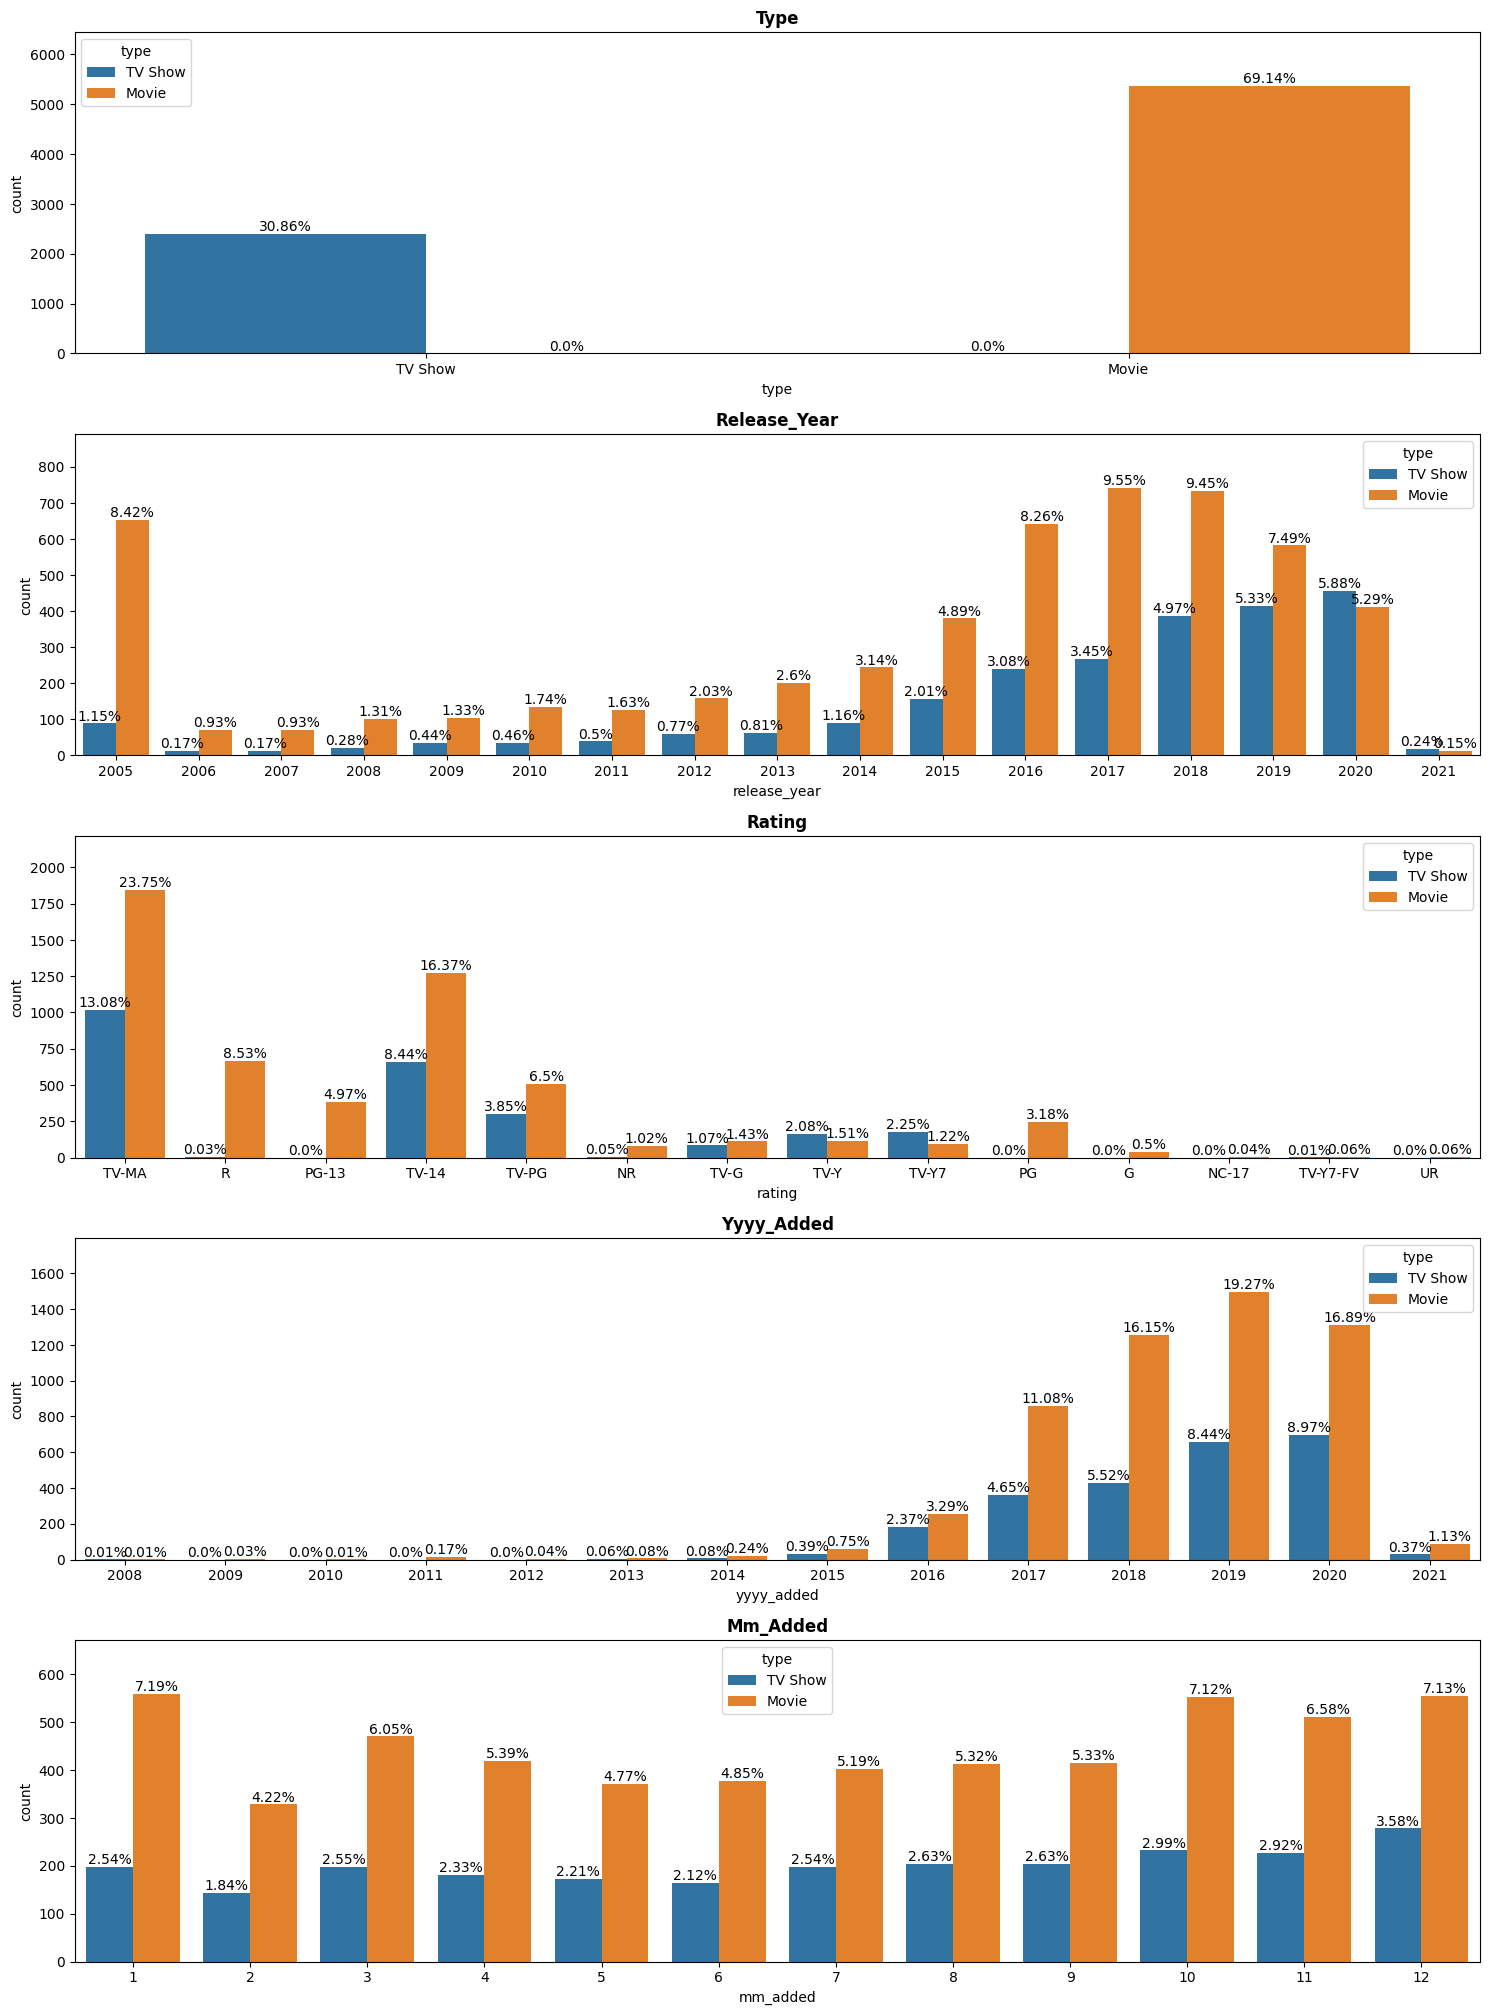

In [35]:
# Let's Plot the countplots of each variable in target_variables

# Let's Obtain the target variable that having maximum 20 categories in features
tar_var = [var for var in nfdf.columns if len(nfdf[var].value_counts()) < 20]

plt.figure(figsize=(15, T*4))
for m,var in enumerate(tar_var):
    plot = plt.subplot(T, 1, m+1)
    ax = sns.countplot(x = nfdf[var], hue=nfdf['type']).margins(y=0.20)
    plt.title(f'{var.title()}', weight='bold')
    plt.tight_layout()
    annote_percentage(plot)

**Observations found:**

Netflix offers a higher percentage of movies (69.14%) compared to TV shows (30.86%).

Most Netflix movies were released between 2015 and 2020, while the bulk of Netflix TV shows came out from 2018 to 2020.

For release years, 2017 saw the highest movie releases, while 2020 marked the peak for TV show releases on Netflix.

From 2006 to 2019, Netflix consistently introduced more new movies than TV shows. However, in 2020, the trend shifted, with more TV shows than movies, indicating a focus shift towards TV content.

The years 2020 and 2021 will witness the greatest number of TV show releases on Netflix.

A significant portion of both TV shows and movies on Netflix carry a TV-MA rating, followed by TV-14.

Content additions in 2019 were predominantly movies, while TV shows took the lead in 2020.

In 2019, around 27.71% of all content additions were made by Netflix.

Content influx was prominent in October and January, though consistent throughout the year.

**Let's do Bivariate Analysis**

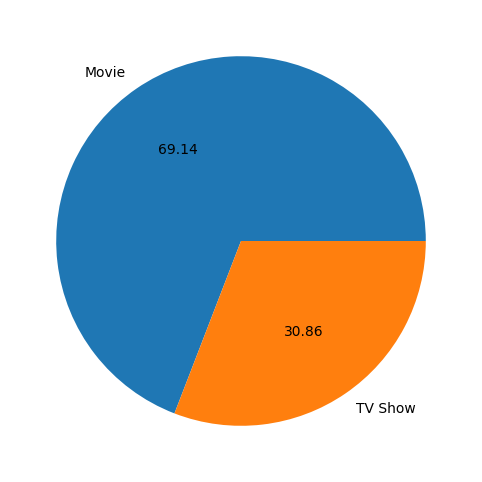

In [36]:
# LEt's find No. of Movies and TV shows that are available on Netflix.

plt.figure(figsize=(8,6))

# Define the data
type_df = nfdf.groupby(by='type').size()

# Now Plot the data
plt.pie(type_df, labels=['Movie','TV Show'], autopct='%.2f')

plt.show()

Netflix boasts a larger collection of movies (69.14%) in comparison to TV shows (30.86%).

<Figure size 600x400 with 0 Axes>

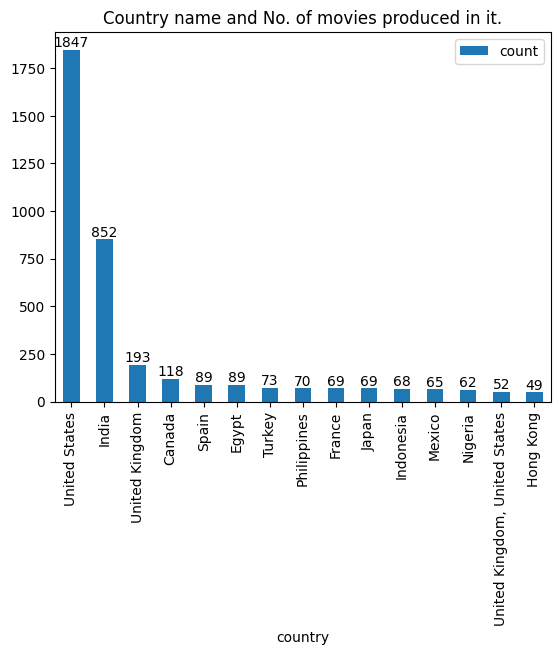

In [37]:
# let's find the country where the maximun movies are produced.

# Now Create a dataframe as 'mv_ctry_df'.
mv_ctry_df = pd.DataFrame(mvdf.groupby(by='country').size()).sort_values(by= 0, ascending = False)
mv_ctry_df.rename(columns={0:'count'}, inplace=True)

# Let's remove the observations where the country data is not available
mv_ctry_df = mv_ctry_df[mv_ctry_df.index != 'Country Unavailable']

plt.figure(figsize=(6,4))

# Let's plot a bar graph to show top 15 countries.
ax = mv_ctry_df.head(15).plot(kind='bar')

ax.bar_label(ax.containers[0])
plt.title('Country name and No. of movies produced in it.')

plt.show()

The primary source of movies on Netflix is the United States, followed by India. hong kong is last in list.

<Figure size 600x400 with 0 Axes>

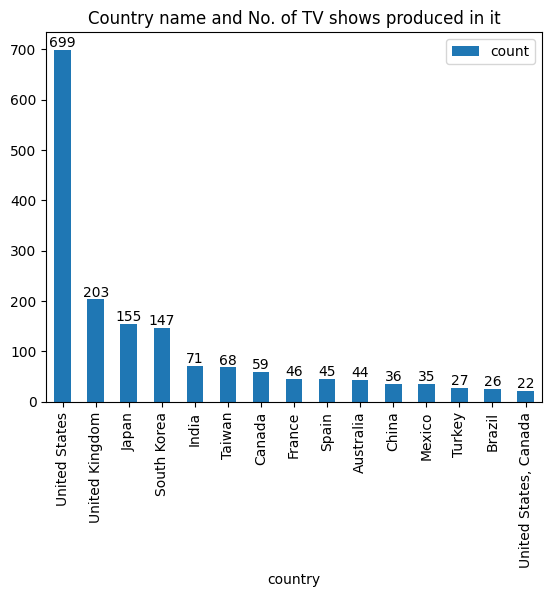

In [38]:
# Let's find the country in which maximun TV shows are produced.

# Now create a dataframe as 'tv_ctry_df'.
tv_ctry_df = pd.DataFrame(tvdf.groupby(by='country').size()).sort_values(by= 0, ascending = False)
tv_ctry_df.rename(columns={0:'count'}, inplace=True)

# Let's remove the fied where the country data is not available
tv_ctry_df = tv_ctry_df[tv_ctry_df.index != 'Country Unavailable']

plt.figure(figsize=(6,4))

# Let's plot bar graph for top 15 countries.
ax = tv_ctry_df.head(15).plot(kind='bar')

plt.title('Country name and No. of TV shows produced in it')
ax.bar_label(ax.containers[0])

plt.show()

Among the TV shows accessible on Netflix, the United States and the United Kingdom stand out as the top two producing countries. Canada is at last in the list.







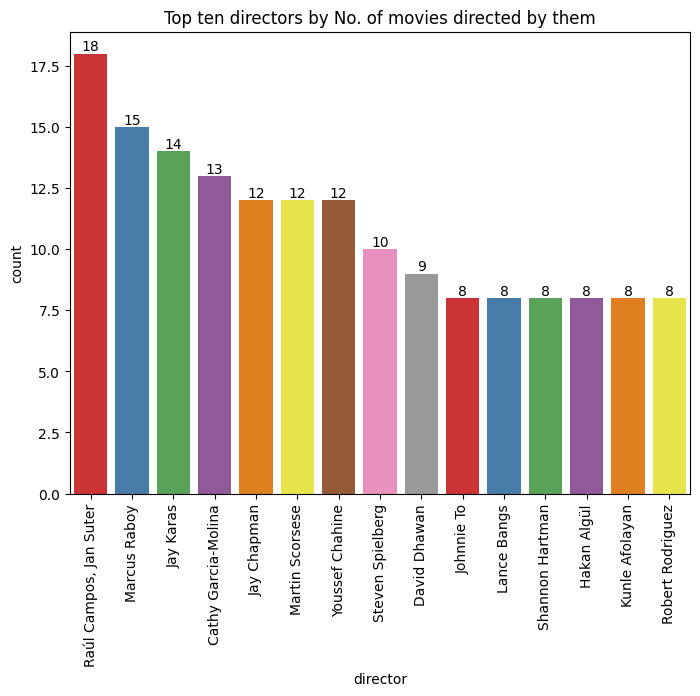

In [39]:
# let's find the directors of the majority of the movies

# Let's remove the fields which have "director unavailable".
mvdf = mvdf[mvdf['director'] != 'Director Unavailable']

# Set size of plot
plt.figure(figsize=(8,6))

# Let's Plot count plot graph for top most 15 directors of movies
ax = sns.countplot(x=mvdf['director'], order=mvdf.director.value_counts().index[:15], palette='Set1')

ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top ten directors by No. of movies directed by them')

plt.show()

The majority of movies open for public viewing on Netflix were directed by Raul Campos and Jan Suter.

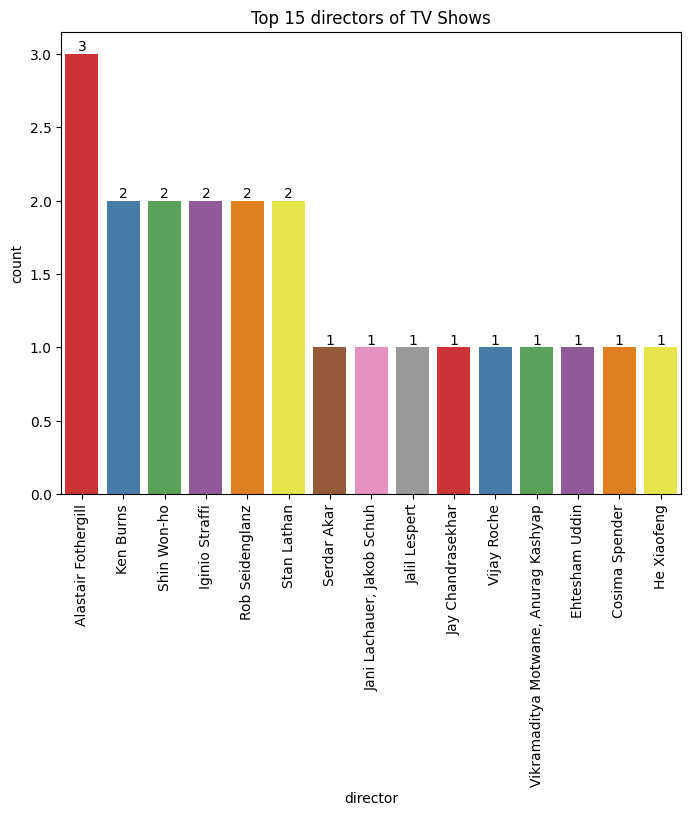

In [40]:
# let's find the top directors of the TV Shows.

tvdf = tvdf[tvdf['director'] != 'Director Unavailable']

# Set the size of plot
plt.figure(figsize=(8,6))

# Let's plot the count plot top 15 directors of TV Shows.
ax = sns.countplot(x=tvdf['director'], order=tvdf.director.value_counts().index[:15],palette='Set1')

ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 15 directors of TV Shows')

plt.show()

Alastair Fothergill is the director behind a significant portion of the TV shows accessible on Netflix for public viewing.

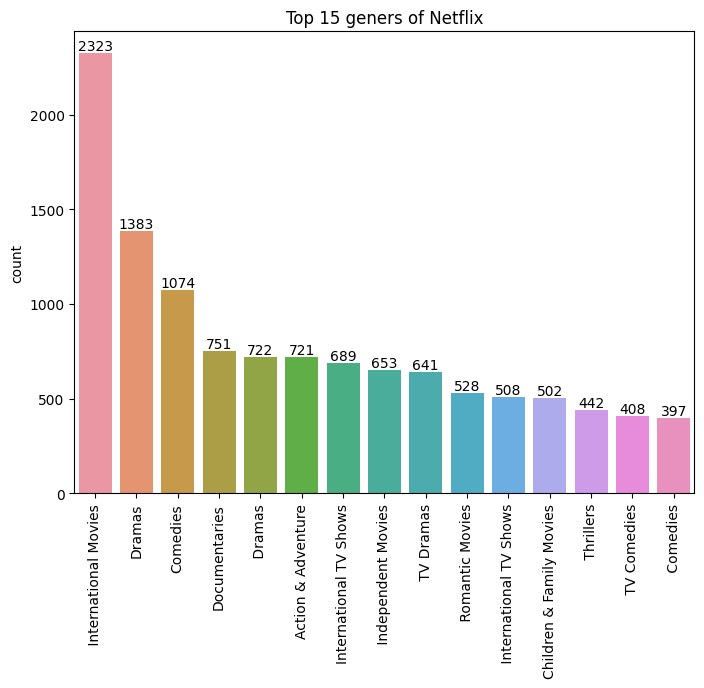

In [41]:
# Let's find the Most Popular Genres

# Creating a dataframe named as 'gndf'
gndf = nfdf.geners.str.split(',', expand=True).unstack()

# Set the size of plot
plt.figure(figsize=(8,6))

# Let's Plot the count plot for top most 15 geners.
ax = sns.countplot(x=gndf, order = gndf.value_counts().index[:15])

ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Top 15 geners of Netflix')

plt.show()

Netflix offers international movies and ranks second in popularity for drama content.

In [42]:
# Let's install worldcloud.
!pip install wordcloud

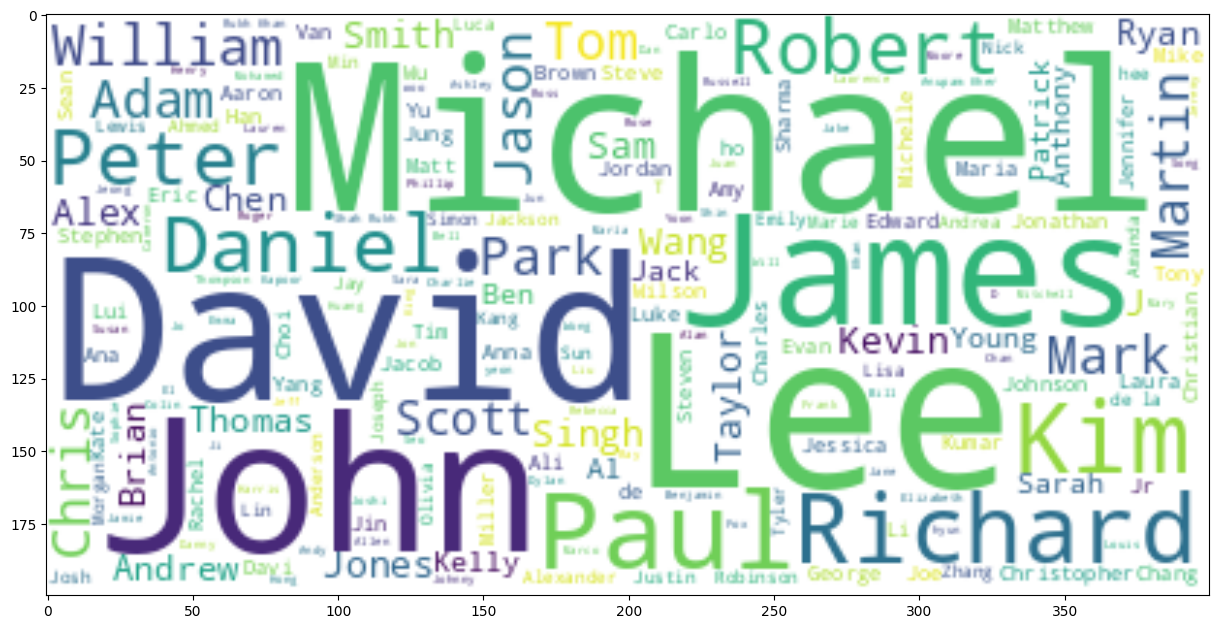

In [43]:
# Let's Print the Wordcloud for actors starred in movies and TV Shows of Netflix

# Let's import worldcloud
from wordcloud import WordCloud

# Set size of plot
plt.subplots(figsize=(15,10))

# Let's remove the fields where cast is not available.
csdf = nfdf[nfdf['cast'] != 'Cast Unavailable']

# Now generate a word cloud
cast_wordcloud = WordCloud(background_color ='white').generate(','.join(csdf.cast))

plt.imshow(cast_wordcloud, interpolation="bilinear")

plt.show()

Lee, Michel, David, Jhon, and James are the prominent actors featured in films and TV shows with the highest availability on Netflix.

**Observations :**

Netflix's content library is dominated by movies (69.14%) as compared to TV shows (30.86%).

The majority of movies accessible on Netflix originate from the United States, with India as the second-leading contributor.

For TV shows on Netflix, the United States and the United Kingdom stand out as the primary producers.

Directors Raul Campos and Jan Suter have helmed a significant portion of movies available on Netflix for public viewing.

Alastair Fothergill takes the lead in directing most of the TV shows available on Netflix for public consumption.

Netflix offers a diverse range of international movies and ranks second in hosting popular drama content.

Actors Lee, Michel, David, Jhon, and James have a notable presence in the films and TV shows that are most prevalent on Netflix.

**Let's do Multivariate Analysis**

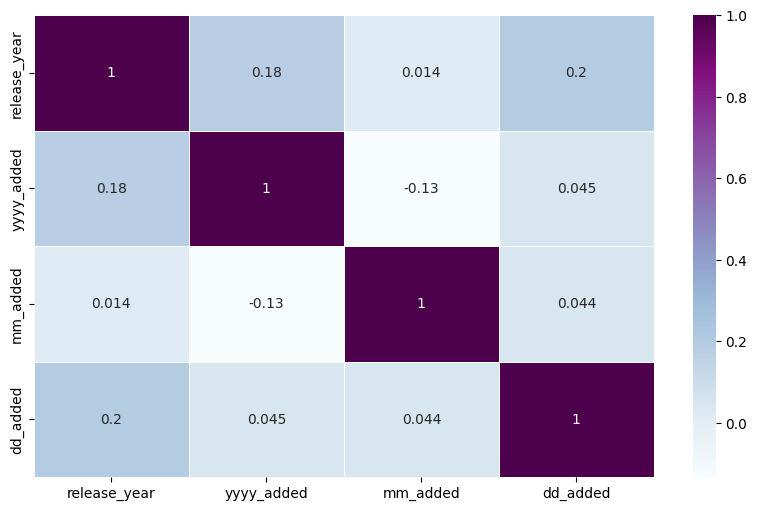

In [44]:
# Let's see the correlation with the help of heatmap
fig, ax = plt.subplots(figsize = (10, 6))
sns.heatmap(nfdf.corr(),ax = ax, annot=True, cmap='BuPu', linewidths=0.40)
plt.show()

The 'release_year' and 'yyyy_added' variables exhibit a positive correlation of approximately 0.18. This suggests a modest positive relationship between the release year of the content and the year it was added to Netflix.

The 'release_year' and 'dd_added' variables demonstrate a positive correlation of around 0.20. This indicates a slight positive relationship between the release year of the content and the day it was added to Netflix.

The 'yyyy_added' and 'mm_added' variables show a negative correlation of roughly -0.13. This implies a weak negative relationship between the year content was added to Netflix and the month it was added.

The 'mm_added' and 'dd_added' variables display a small positive correlation of about 0.04. This indicates a limited positive relationship between the month content was added to Netflix and the day it was added.

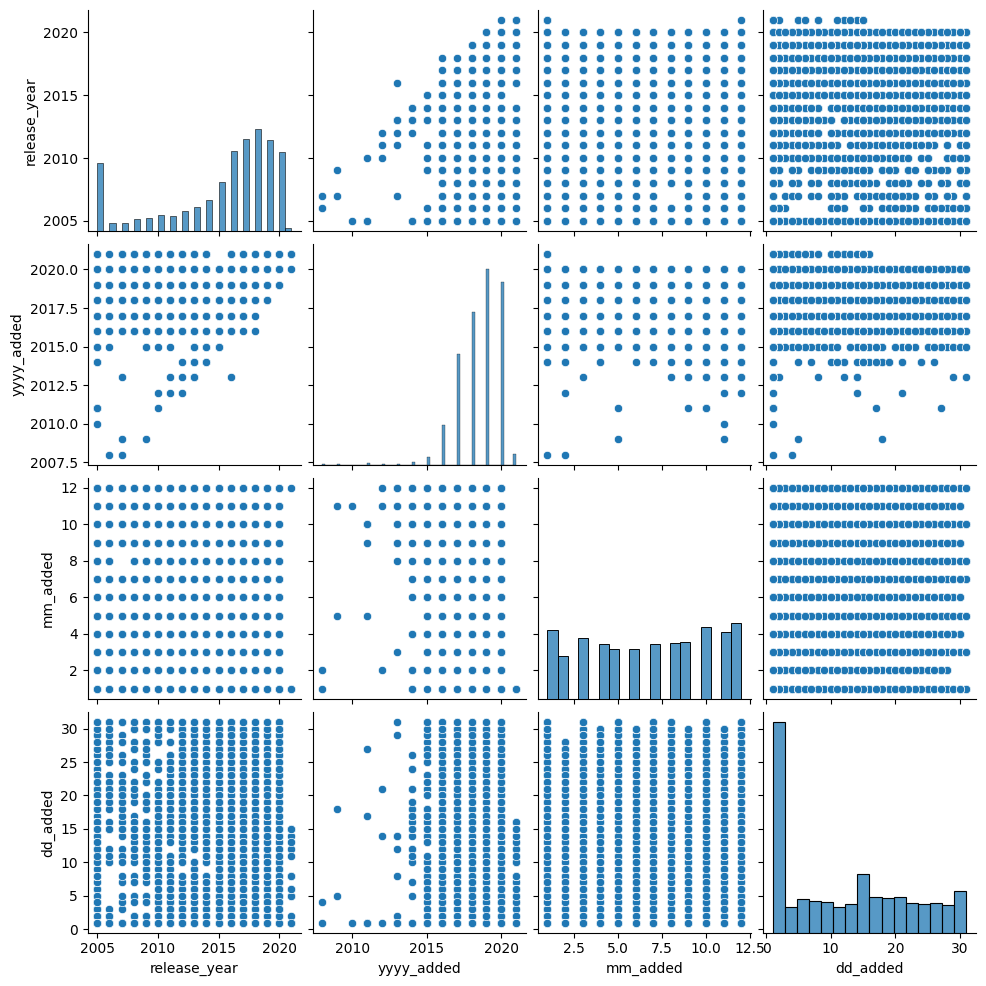

In [45]:
# Let's Plot Pair
sns.pairplot(nfdf)
plt.show()


From the graphical representation of 'release_year' and 'year_added,' it is evident that Netflix is progressively expanding its collection by introducing and releasing more movies and TV shows as time goes on.

Observing the plot of 'release_year' and 'month_added,' it can be inferred that Netflix distributes movies and TV shows consistently across all months of the year.

**Observations :**

A subtle correlation is visible between the release year of a movie or TV show and the day of the month it was added to Netflix.

By examining the relationship between 'release_year' and 'year_added' in the plot, it is apparent that Netflix is progressively augmenting its content by consistently introducing and launching more movies and TV shows over time.

The plot depicting 'release_year' and 'month_added' indicates that Netflix maintains a consistent distribution of movie and TV show releases across all months throughout the year.

**Let's do Data Pre-processing operatins**

**Textual Data Preprocessing**

In [46]:
# We requested the clustering of similar content by utilizing text-based attributes. Consequently, clustering is performed solely using the 'description' variable from the dataset.

# Let's Create a new variable having length of words of description variable
nfdf['des_len'] = nfdf['description'].apply(lambda x: len(x.split()))
nfdf.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22


**Now Expand Contraction**

Contractions, which involve shortening words or phrases by replacing letters with an apostrophe, are omitted to enhance text standardization. This process is crucial in maintaining the integrity of words within the context of Natural Language Processing (NLP).

In [47]:
# Let's Install contraction library
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.9 MB/s eta 0:00:00


In [48]:
# Let's define a Function to expands contractions from the corpus

# For that import contractions library in environment
import contractions

def con_pro(corpus):
    '''Functions that would expand the contractions from corpus
    Args:
    corpus (string): corpus for which function has to be applied.
    Returns:
    corpus having expanded contractions
    '''
    cor = contractions.fix(corpus)
    return corpus

# Utilize the "contraction_process" function to apply it to every instance within the "description" variable.
nfdf['con_des'] = nfdf['description'].apply(con_pro)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...


With the aid of the Python "contractions" library, contractions within the corpus were effectively removed.

**LEt's remove Remove Stopwords and Punctuations**

In [49]:
# Import stopwords from nltk
from nltk.corpus import stopwords

In [50]:
# Let's Extract the English stopwords using nltk
stopwords_eng = stopwords.words('english')
# Now Display the English stopwords
np.array(stopwords_eng)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [51]:
len(stopwords_eng)

179

so, no. of english stopwords are 179.

In [52]:
# Now Import punctuations
import string
# Let's Extract punctuations
punc = string.punctuation
# Now Display punctuations
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
len(punc)

32

There are total 32 no. of puctuations.

In [54]:
## Now Create a new variable punctuation_% containing percentage of punctuations of each corpus

import string

def punc_ct(txt):
    ct = sum([1 for c in txt if c in punc])
    return 100*ct/len(txt)

# Let's Apply a function to contractions_description variable
nfdf['punc_%'] = nfdf['con_des'].apply(lambda x: punc_ct(x))
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282


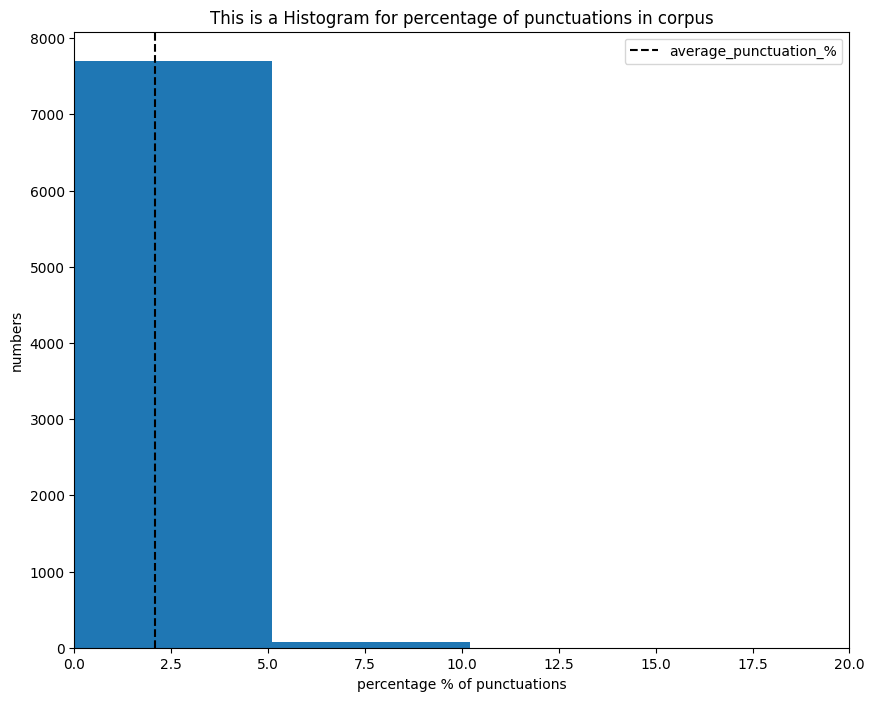

In [55]:
# Let's plot a Histogram for percentage of punctuations in contractions_description variable

# Set the size of plot
plt.figure(figsize=(10,8))
bins = np.linspace(0, 250, 50)

# Now Plot histogram
plt.hist(nfdf['punc_%'], bins)
plt.axvline(nfdf['punc_%'].mean(), color='black', linestyle='dashed', label='average_punctuation_%')

# Do Labeling to plot
plt.title('This is a Histogram for percentage of punctuations in corpus')
plt.xlabel('percentage % of punctuations')
plt.ylabel('numbers')
plt.legend(loc='best')
plt.xlim(0,20)

plt.show()

Most of the corpus comprises punctuation, constituting less than 5% of the entire content.

In [56]:
# Create a function that performs the following operations on the corpus: removing stopwords and punctuation, and converting the text to lowercase.


def remove_stopwords_punc(corpus):
    '''Develop a function that applies three actions to the corpus- removing stopwords and punctuation, and converting the text to lowercase.
    Args:
    The provided function is to be applied to the given text corpus (string).
    Returns:
    Create a transformed corpus by converting it to lowercase and removing both stopwords and punctuation.
    '''
    punc = "your_list_of_punctuation_characters_here"  # Define your list of punctuation characters
    stopwords = ["your", "list", "of", "stopwords", "here"]  # Define your list of stopwords

    no_punc = [char for char in corpus if char not in punc]
    no_punc = ''.join(no_punc)
    return ' '.join([word.lower() for word in no_punc.split() if word.lower() not in stopwords])

# Utilize the "remove_stopwords_punc" function to process every occurrence within the variable "contractions_description."
nfdf['no_sw_pun_des'] = nfdf['con_des'].apply(remove_stopwords_punc)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d ."


The "remove_stopwords_punctuations" function effectively transformed the corpus to lowercase, while also eliminating stopwords and punctuation.

**Let's Remove URL(s)**

In [57]:
# Let's define a Function to removes URL(s) from corpus

# So, for that let's Import regex

import re

def re_URL(corpus):
    '''
    If present, this function removes URL addresses from a given corpus.
    Args:
        The function is designed to be applied to a string corpus.
    Returns:
        The resulting string is cleansed of any URL addresses.
    '''
    return re.sub(r'https?://\S+|www\.\S+', '', corpus)

# Utilize the "remove_URL" function to process each instance within the "no_sw_pun_description" variable.
nfdf['cl_des'] = nfdf['no_sw_pun_des'].apply(re_URL)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.","i w b d d m wdd m, g j 3% vd m q."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.","a dvg qk mx c, d vv m wk w b d w g d v."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.","w m d dd, w d d g ' g jg d g m."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.","i wd, g-d b d m dg m xm m, bv wm j g."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d-g x w wdg m l vg b g bkjk.
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .","a g xm w m m bd md d m , b k kg d ."


Every corpus within the "no_sw_pun_description" variable has been purged of all URLs.

**Let's Remove Emails**

In [59]:
## Function for removing email addresses from a text corpus.

def re_emails(corpus):
    '''
    It eliminates any email addresses from the given corpus, should they exist.
    Args:
        Input parameter "corpus" (string): The string on which the function is intended to be used.
    Returns:
        String devoid of email addresses after cleaning.
    '''
    cp_split = corpus.split()
    return ' '.join([i for i in cp_split if '@' not in i])

# Utilize the "remove_emails" function on every instance within the variable "clean_description".
nfdf['cl_des'] = nfdf['cl_des'].apply(re_emails)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.","i w b d d m wdd m, g j 3% vd m q."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.","a dvg qk mx c, d vv m wk w b d w g d v."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.","w m d dd, w d d g ' g jg d g m."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.","i wd, g-d b d m dg m xm m, bv wm j g."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d-g x w wdg m l vg b g bkjk.
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .","a g xm w m m bd md d m , b k kg d ."


If present, the "remove_emails" function is employed to eliminate any email addresses from the corpus.

**Let's Remove HTML-Tags**

In [60]:
# Function for removing HTML tags from a text corpus.

# Include the BeautifulSoup library.
from bs4 import BeautifulSoup

def re_html_tags(corpus):
    '''
    Eliminates HTML tags from a corpus, if they exist.
    Args:
        Input parameter "text" (string): The corpus to which the function is intended to be applied.
    Returns:
        Corpus cleaned of HTML tags.
    '''
    return BeautifulSoup(corpus, 'html.parser').get_text()

# Utilize the "remove_html_tags" function on every instance within the variable "clean_description".
nfdf['cl_des'] = nfdf['cl_des'].apply(re_html_tags)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.","i w b d d m wdd m, g j 3% vd m q."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.","a dvg qk mx c, d vv m wk w b d w g d v."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.","w m d dd, w d d g ' g jg d g m."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.","i wd, g-d b d m dg m xm m, bv wm j g."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d-g x w wdg m l vg b g bkjk.
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .","a g xm w m m bd md d m , b k kg d ."


**Let's Remove Special Characters**

In [62]:
# Function for removing special characters.

# Include the regex library.

import re

def re_sp_char(corpus):
    """Eliminate any special characters from the corpus, if they exist.
    args:
    Input parameter "corpus" (string): The corpus to which a function is intended to be applied.
    return:
    Corpus cleaned of any special characters.
    """
    return re.sub(r"[^a-zA-Z0-9]"," ",corpus)

# Utilize the "remove_special_char" function on each instance within the variable "clean_description".
nfdf['cl_des'] = nfdf['cl_des'].apply(re_sp_char)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.",i w b d d m wdd m g j 3 vd m q
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.",a dvg qk mx c d vv m wk w b d w g d v
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.",w m d dd w d d g g jg d g m
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.",i wd g d b d m dg m xm m bv wm j g
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d g x w wdg m l vg b g bkjk
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .",a g xm w m m bd md d m b k kg d


The corpus has been effectively cleared of special characters.


**Let's Remove Words and Digits Contain Digits**

In [63]:
# Let's defina a Function to eliminate digits from a corpus

# LEt's include regex library in environment
import re

def re_digits(corpus):
    '''
    Eliminates digits from a corpus, should they be present.
    Args:
        corpus (string): corpus to which the function is to be applied
    Returns:
        String devoid of any digits after cleaning.
    '''
    return re.sub('\w*\d\w*','',corpus)

# Utilize the "remove_digits" function on each instance within the variable "clean_description".
nfdf['cl_des'] = nfdf['cl_des'].apply(re_digits)
nfdf.head(6)

,show_id,type,title,director,cast,country,release_year,rating,duration,geners,description,yyyy_added,mm_added,dd_added,des_len,con_des,punc_%,no_sw_pun_des,cl_des
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,26,In a future where the elite inhabit an island ...,2.205882,"i w b d d m wdd m, g j 3% vd m q.",i w b d d m wdd m g j vd m q
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,24,After a devastating earthquake hits Mexico Cit...,1.351351,"a dvg qk mx c, d vv m wk w b d w g d v.",a dvg qk mx c d vv m wk w b d w g d v
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,24,"When an army recruit is found dead, his fellow...",2.013423,"w m d dd, w d d g ' g jg d g m.",w m d dd w d d g g jg d g m
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,23,"In a postapocalyptic world, rag-doll robots hi...",2.758621,"i wd, g-d b d m dg m xm m, bv wm j g.",i wd g d b d m dg m xm m bv wm j g
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,22,A brilliant group of students become card-coun...,1.398601,a b g d bm d-g x w wdg m l vg b g bkjk.,a b g d bm d g x w wdg m l vg b g bkjk
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1,23,A genetics professor experiments with a treatm...,1.342282,"a g xm w m m bd md d m , b k kg d .",a g xm w m m bd md d m b k kg d


The "remove_digits" function has proficiently eliminated digits from the corpus.

**Let's Remove Whitespaces**

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***